# General Audio Peak Detection Example Notebook
This notebook demonstrates general audio waveform peak detection and simple use cases (onset detection, silence trimming, event counting) using the Peak_Finding_Toolbox.

---

## 1. Setup and Imports

In [ ]:
import os, sys
from pathlib import Path

repo_root = Path().resolve().parent
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

%pip install -e .

import numpy as np
import matplotlib.pyplot as plt
from toolbox.data_loader import load_audio_file
from toolbox.peak_finder import _detect_peaks_audio
from toolbox.plotting import scroll_plot


Obtaining file:///mnt/c/Users/Brody/OneDrive/Documents/Coding/GitHub/Peak_Finding_Toolbox
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for Peak_Finding_Toolbox (pyproject.toml) ... done
  Created wheel for Peak_Finding_Toolbox: filename=peak_finding_toolbox-0.1.0-0.editable-py3-none-any.whl size=4193 sha256=4f65714cb2b365c717501af7a36d0f7c69f91d86e776f59971c1bb6784af61bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-6e6meoep/wheels/71/79/2e/b02f985037b822faa60f220acd6a1a89055dae999e079cfe32
Successfully built Peak_Finding_Toolbox
  Attempting uninstall: Peak_Finding_Toolbox
    Found existing installation: Peak_Finding_Toolbox 0.1.0
    Uninstalling Peak_Finding_Toolbox-0.1.0:
      Successfully uninstalled Peak_Finding_Toolbox-0.1.0
Note: you may need to restart the kernel to use updated packages.


---

## 2. Load and Preprocess Audio

In [ ]:
audio_path = 'data/general_audio/drum_loop_126_bpm.wav'
data, sr = load_audio_file(audio_path, sr=48000)

# Build time vector in ms
times_ms = np.arange(len(data)) / sr * 1000


---

## 3. Detect Peaks (Onsets)

In [ ]:
# Detect the top 15 prominent peaks in the raw waveform
peak_idxs = _detect_peaks_audio(data, times_ms, n_peaks=15, base_sigma=0.01)
peak_times = times_ms[peak_idxs]
print(f"Detected {len(peak_idxs)} peaks at times (ms): {np.round(peak_times, 1)}")


Detected 15 peaks at times (ms): [ 495.8  511.5 1448.3 1463.8 2416.2 3368.6 4305.4 4321.  5257.8 5273.4
 6210.2 6225.8 7162.6 7178.1 7187.3]


---

## 4. Visualize Peaks on Waveform

<Figure size 1000x300 with 0 Axes>

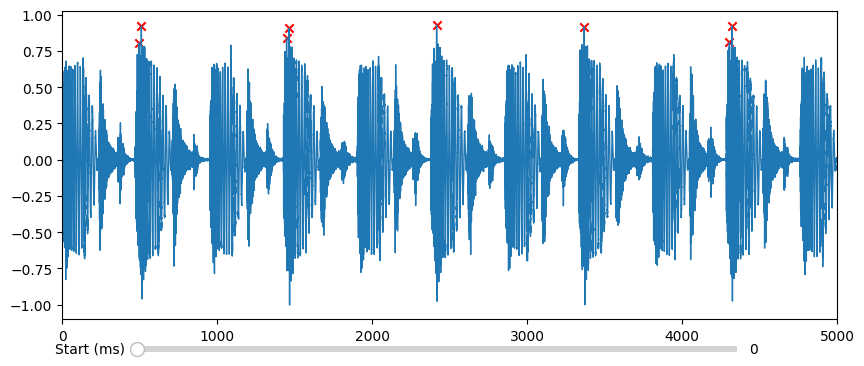

(<Figure size 1000x400 with 2 Axes>,
 <Axes: >,
 <matplotlib.widgets.Slider at 0x7efeee743590>)

In [27]:
plt.figure(figsize=(10,3))
scroll_plot(times_ms, data, window_width_ms=5000, peaks=peak_idxs)

---

## 6. Event Counting Across Files

In [ ]:
# Looping through multiple samples
audio_dir = 'data/general_audio/'
results = []
for fname in os.listdir(audio_dir):
    if fname.endswith('.wav'):
        path = os.path.join(audio_dir, fname)
        d, s = load_audio_file(path, sr=None)
        t = np.arange(len(d)) / s * 1000
        idxs = _detect_peaks_audio(d, t, n_peaks=20, base_sigma=1.0)
        results.append({'file': fname, 'n_peaks': len(idxs)})

import pandas as pd
df = pd.DataFrame(results)
df


,file,n_peaks
0,casette_synth_loop.wav,20
1,drum_loop_126_bpm.wav,20


---

## 5. CLI Usage

In [ ]:
# Example command line usage (Peak labeling a percussive sample)
"""
python -m toolbox.main audio \
    data/general_audio/drum_loop_126_bpm.wav \
    --n_peaks 15 \
    --sigma 1.0 \
    --window_width 5000 \
    --outdir results/example_results/ \
    --show
"""